In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sn
import matplotlib.pyplot as plt


import preprocessing



In [2]:
user_health = preprocessing.load_users_health()
food_pref = preprocessing.load_food_pref_dataset()

In [3]:
user_health.head()

,seqn,weight,height,bmi,upper_leg_length,upper_arm_length,arm_circumference,waist_circumference,hip_circumference,systolic,diastolic,pulse
0,109264.0,42.2,154.7,17.6,36.3,33.8,22.7,63.8,85.000000,108.000000,67.000000,93.333333
1,109266.0,97.1,160.2,37.8,40.8,34.7,35.8,117.9,126.100000,99.000000,54.333333,66.666667
2,109270.0,75.3,156.0,30.9,42.6,36.1,31.0,91.4,105.696877,124.666667,73.333333,95.333333
3,109271.0,98.8,182.3,29.7,40.1,42.0,38.2,120.4,108.200000,107.000000,67.000000,71.333333
4,109273.0,74.3,184.2,21.9,41.0,41.1,30.2,86.8,94.500000,113.666667,67.333333,70.333333


In [4]:
food_pref.head()

,seqn,intake_day_of_week,name_of_eating_occasion,source_of_food,location_of_food_home,usda_food_code,grams,energy_kcal,protein_gm,carbohydrate_gm,...,pfa_eicosadienoic_gm,pfa_eicosatrienoic_gm,pfa_docosapentaenoic_gm,pfa_docosahexaenoic_gm,Food code,Main food description,WWEIA Category number,WWEIA Category description,Start date,End date
0,109263,Friday,Dinner,Store - grocery/supermarket,Yes,28320300,199.50,114.0,12.11,5.07,...,0.012,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
1,112171,Saturday,Dinner,Grown or caught by you or someone you know,Yes,28320300,299.25,172.0,18.08,8.32,...,0.018,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
2,112586,Saturday,Lunch,From someone else/gift,Yes,28320300,199.51,114.0,12.11,5.07,...,0.012,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
3,112670,Sunday,Dinner,Store - grocery/supermarket,Yes,28320300,128.25,74.0,7.75,3.56,...,0.008,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31
4,112670,Sunday,Breakfast,Store - grocery/supermarket,Yes,28320300,171.00,98.0,10.33,4.75,...,0.010,5.397605e-79,5.397605e-79,5.397605e-79,28320300,"Pork with vegetable excluding carrots, broccol...",3802,Soups,2019-01-01,2020-12-31


In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
ohe = OneHotEncoder(sparse_output=False)

In [7]:
categorical_rows = ['intake_day_of_week','name_of_eating_occasion','source_of_food','location_of_food_home', 'WWEIA Category description']
food_pref[categorical_rows].head()

,intake_day_of_week,name_of_eating_occasion,source_of_food,location_of_food_home,WWEIA Category description
0,Friday,Dinner,Store - grocery/supermarket,Yes,Soups
1,Saturday,Dinner,Grown or caught by you or someone you know,Yes,Soups
2,Saturday,Lunch,From someone else/gift,Yes,Soups
3,Sunday,Dinner,Store - grocery/supermarket,Yes,Soups
4,Sunday,Breakfast,Store - grocery/supermarket,Yes,Soups


In [8]:
ohe.fit_transform(food_pref[categorical_rows])

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
user_health[user_health['bmi'] < 27][user_health['bmi'] > 18][user_health['systolic'] < 120][user_health['diastolic'] < 80].count()


C:\Users\L\AppData\Local\Temp\ipykernel_8844\1023722237.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_health[user_health['bmi'] < 27][user_health['bmi'] > 18][user_health['systolic'] < 120][user_health['diastolic'] < 80].count()
C:\Users\L\AppData\Local\Temp\ipykernel_8844\1023722237.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_health[user_health['bmi'] < 27][user_health['bmi'] > 18][user_health['systolic'] < 120][user_health['diastolic'] < 80].count()
C:\Users\L\AppData\Local\Temp\ipykernel_8844\1023722237.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_health[user_health['bmi'] < 27][user_health['bmi'] > 18][user_health['systolic'] < 120][user_health['diastolic'] < 80].count()


seqn                   3316
weight                 3316
height                 3316
bmi                    3316
upper_leg_length       3316
upper_arm_length       3316
arm_circumference      3316
waist_circumference    3316
hip_circumference      3316
systolic               3316
diastolic              3316
pulse                  3316
dtype: int64

In [10]:
len(user_health)

11656

In [11]:
food_pref.groupby(by='seqn').count()['intake_day_of_week']

seqn
109263    11
109264    11
109265    14
109266     6
109269     8
          ..
124817     8
124818     8
124819    13
124820     5
124821    10
Name: intake_day_of_week, Length: 12558, dtype: int64

<Axes: >

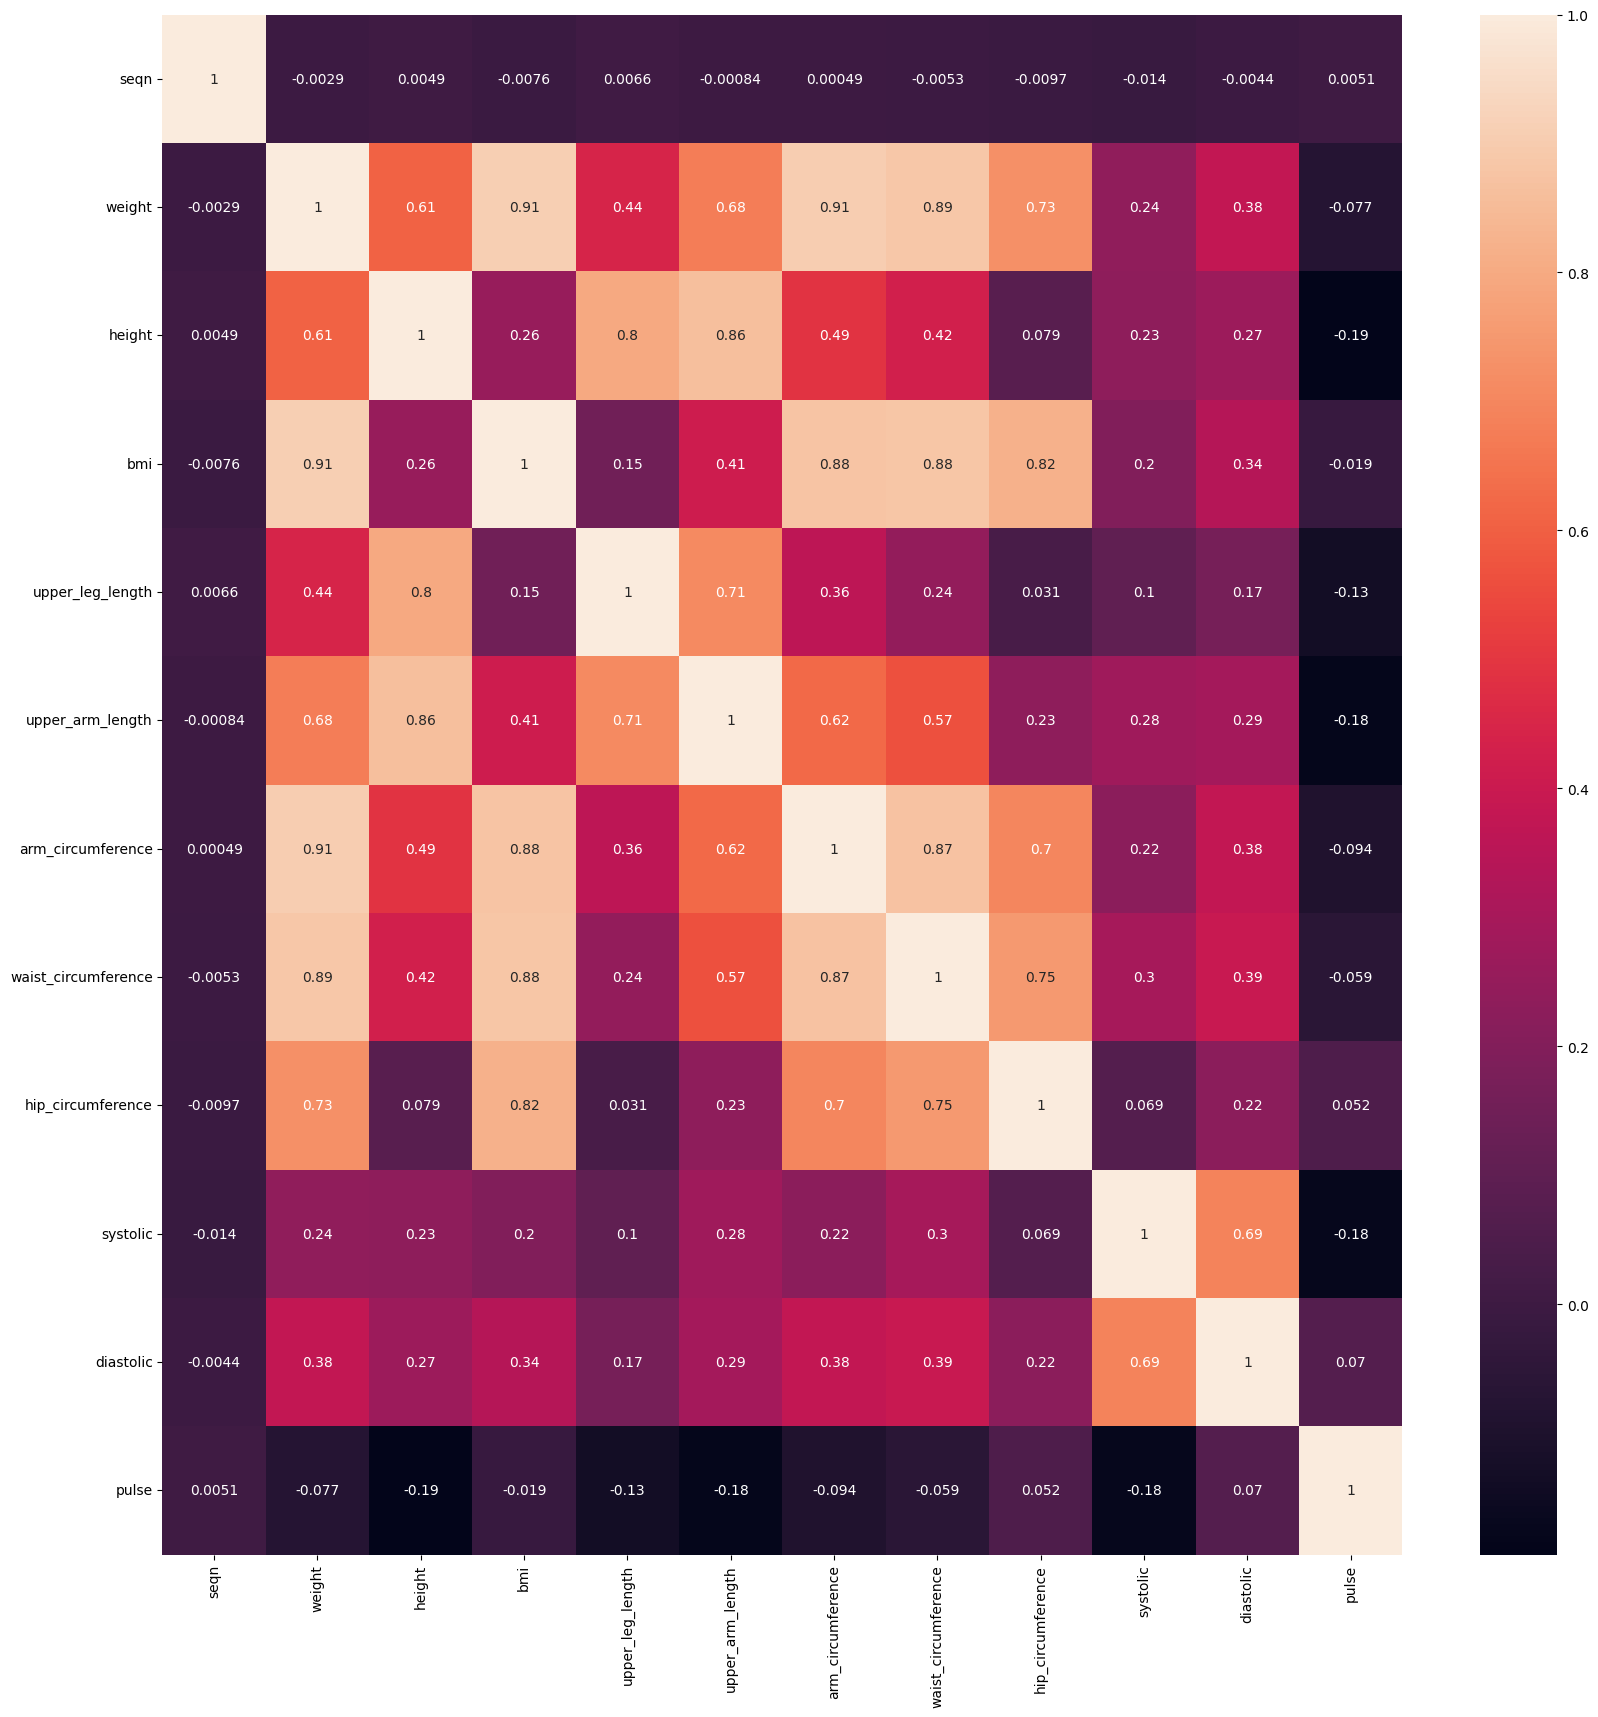

In [12]:
corr = user_health.corr()
plt.figure(figsize=(20, 20))
sn.heatmap(corr, annot=True)

In [13]:
def convert_to_rating(series):                
    count = series.value_counts()

    series = series.apply(lambda x: count[x])

    max_ = count.max()
    min_ = count.min()                 
        
    return (series + 1 - min_) / (max_ - min_ + 1)


In [14]:
df = pd.DataFrame(food_pref)

In [15]:
df['rating'] = food_pref.groupby('seqn')['usda_food_code'].transform(convert_to_rating)

In [16]:
rating_df = df[['seqn', 'usda_food_code', 'rating']]

In [17]:
rating_df.head()

,seqn,usda_food_code,rating
0,109263,28320300,0.5
1,112171,28320300,1.0
2,112586,28320300,1.0
3,112670,28320300,1.0
4,112670,28320300,1.0


In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
user_ids = df["seqn"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}


food_ids = df["usda_food_code"].unique().tolist()
food2food_encoded = {x: i for i, x in enumerate(food_ids)}
food_encoded2food = {i: x for i, x in enumerate(food_ids)}


In [21]:
rating_df["user"] = rating_df["seqn"].map(user2user_encoded)
rating_df["food"] = rating_df["usda_food_code"].map(food2food_encoded)

num_users = len(user2user_encoded)
num_foods = len(food_encoded2food)

C:\Users\L\AppData\Local\Temp\ipykernel_8844\4152026245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df["user"] = rating_df["seqn"].map(user2user_encoded)
C:\Users\L\AppData\Local\Temp\ipykernel_8844\4152026245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df["food"] = rating_df["usda_food_code"].map(food2food_encoded)


In [22]:
rating_df.head()

,seqn,usda_food_code,rating,user,food
0,109263,28320300,0.5,0,0
1,112171,28320300,1.0,1,0
2,112586,28320300,1.0,2,0
3,112670,28320300,1.0,3,0
4,112670,28320300,1.0,3,0


In [26]:
X = rating_df[['user', 'food']].values
y = rating_df['rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
EMBEDDING_SIZE = 50

class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_foods, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_foods = num_foods
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.food_embedding = layers.Embedding(
            num_foods,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.food_bias = layers.Embedding(num_foods, 1)
        
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        food_vector = self.food_embedding(inputs[:, 1])
        food_bias = self.food_bias(inputs[:, 1])
        dot_user_food = tf.tensordot(user_vector, food_vector, 2)
        # Add all the components (including bias)
        x = dot_user_food + user_bias + food_bias
        # The sigmoid activation forces the rating to be between 0 and 1
        return tf.nn.sigmoid(x)
    
model = RecommenderNet(num_users, num_foods, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001)
)

In [32]:
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=100,
    validation_data=(X_test, y_test)
)

Epoch 1/100
1942/1942 [==============================] - 73s 37ms/step - loss: 0.5552 - val_loss: 0.5536
Epoch 2/100
1942/1942 [==============================] - 66s 34ms/step - loss: 0.5508 - val_loss: 0.5494
Epoch 3/100
1942/1942 [==============================] - 67s 35ms/step - loss: 0.5455 - val_loss: 0.5433
Epoch 4/100
1942/1942 [==============================] - 67s 34ms/step - loss: 0.5458 - val_loss: 0.5374
Epoch 5/100
1942/1942 [==============================] - 66s 34ms/step - loss: 0.5443 - val_loss: 0.5316
Epoch 6/100
1942/1942 [==============================] - 64s 33ms/step - loss: 0.5374 - val_loss: 0.5322
Epoch 7/100
1942/1942 [==============================] - 63s 33ms/step - loss: 0.5379 - val_loss: 0.5271
Epoch 8/100
1942/1942 [==============================] - 63s 33ms/step - loss: 0.5349 - val_loss: 0.5269
Epoch 9/100
1942/1942 [==============================] - 64s 33ms/step - loss: 0.5372 - val_loss: 0.5211
Epoch 10/100
1942/1942 [==============================]

KeyboardInterrupt: 

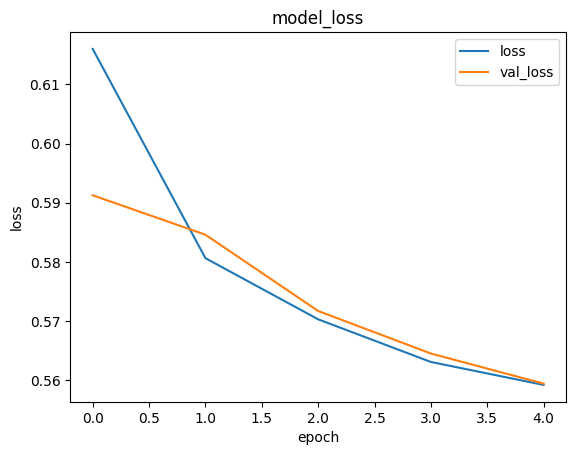

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()